In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

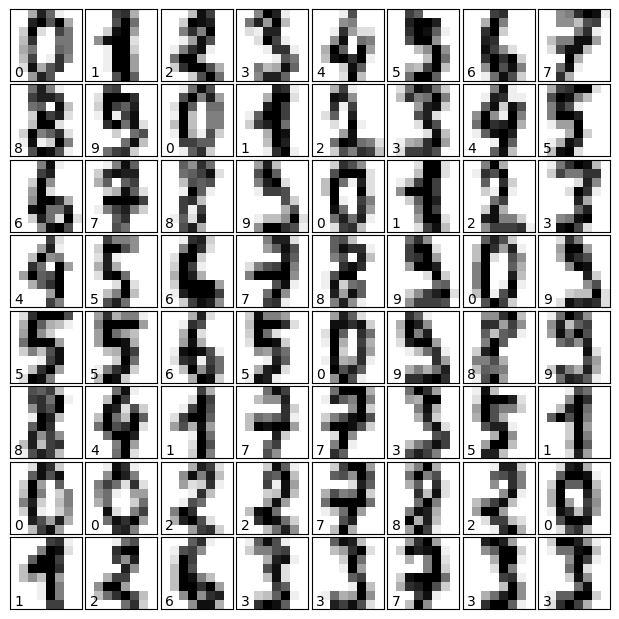

In [5]:
#Visualizing data
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05 , wspace=0.05)

#plot the digit: each image in 8X8 pixels
for i in range (64):
  ax = fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

  #label the image with the target value
  ax.text(0,7, str(digits.target[i]))

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42 , stratify=y
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = SVC(kernel='rbf',C=10,gamma=0.001)
model.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [21]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [22]:
print("SVM Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9831649831649831

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.92      0.98      0.95        60
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        60
           4       0.97      0.98      0.98        60
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        59
           8       0.98      0.91      0.95        58
           9       0.98      0.98      0.98        59

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



In [23]:
cm = confusion_matrix(y_test, y_pred)

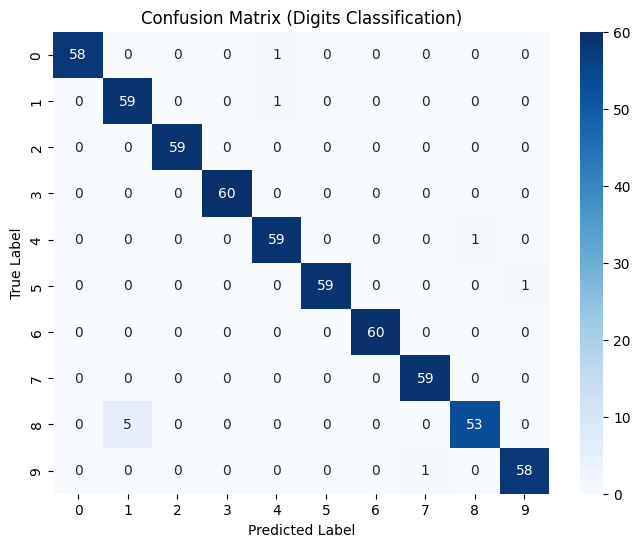

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix (Digits Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

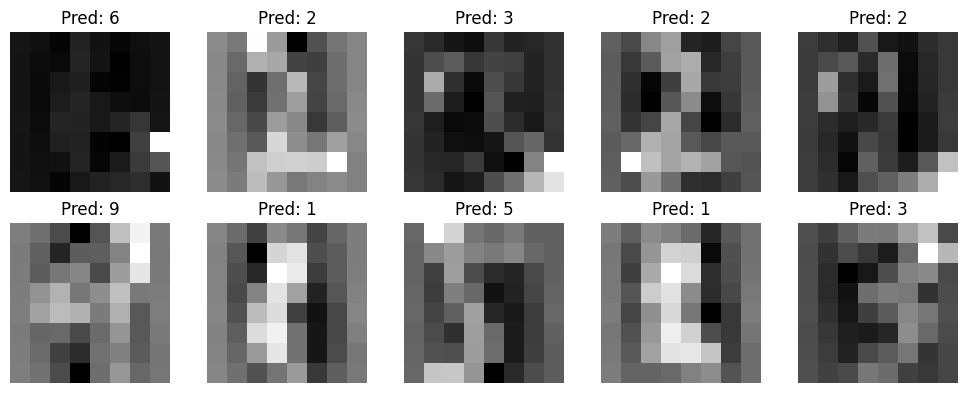

In [25]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()